## Abortion Statistics 🩸

In [25]:
#America
import pandas as pd
import numpy as np
import seaborn as sns
abort_df = pd.read_csv('/Users/sandeepk/Downloads/Abortion_stats.csv')
amer_df = abort_df[abort_df['country']== 'United States of America']

killed = amer_df.groupby('country').agg({'numberofabortions':'sum'})
print(killed.iloc[[0]])

                          numberofabortions
country                                    
United States of America         78700922.0


In [27]:
list_scode = list(set(abort_df['country']))
list_scode
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_scode, pal):
    fig.add_trace(go.Scatter(x = abort_df[abort_df['country']==d]['yearstart'],
                             y = abort_df[abort_df['country']==d]['numberofabortions'],
                             name = d,
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

In [53]:
amer_df = abort_df[abort_df['country'] == 'United States of America']
amer_df.reset_index(inplace=True)
round(amer_df['numberofabortions'].mean(), 0)
amer_2014 = amer_df[amer_df['yearend']== 2014]
amer_2014

,index,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
67,3226,United States of America,840.0,2014,2014,Europe and Northern America,North America,926200.0,NaN,NaN,No,Study,Jones and Jerman 2017,NaN,NaN,Yes,All women,NaN
68,3227,United States of America,840.0,2014,2014,Europe and Northern America,North America,652302.0,NaN,NaN,No,Official Statistics,U.S. Department of Health and Human Services,Incomplete,Acknowledged incomplete,Yes,NaN,"Excludes California, Maryland, and New Hampshire"


In [66]:
abort_2016 = abort_df[abort_df['yearend'] == 2015]
group_2016 = abort_2016.groupby('country').agg({'numberofabortions': 'sum'})
group_2016.sort_values(by='numberofabortions', ascending=False).head(10)

,numberofabortions
country,
India,15644748.0
China,9851961.0
Russian Federation,1450950.0
United States of America,899500.0
France,407483.0
Japan,352776.0
Viet Nam,277834.0
Ukraine,212714.0
United Kingdom of Great Britain and Northern Ireland,197942.0


In [100]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
table = world.merge(abort_df, how='left', left_on=['name'], right_on=['country'])
table
table['numberofabortions'].fillna(0, inplace=True)

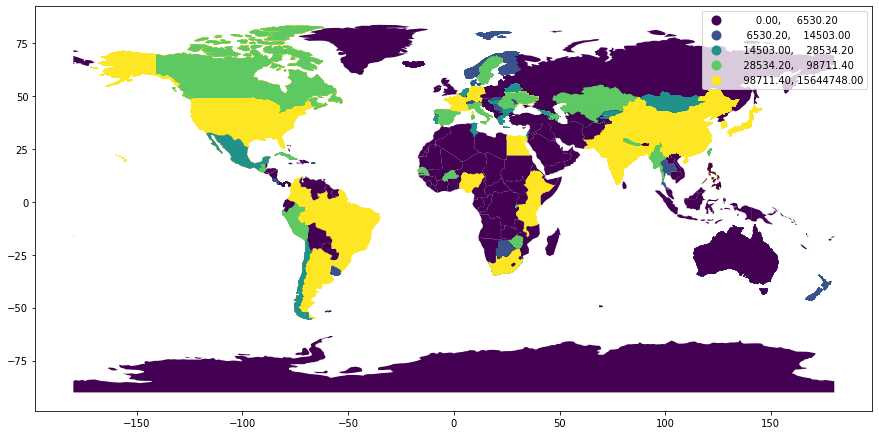

In [109]:
table.plot(
    column='numberofabortions',
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

## UI Country Abortion Analysis

In [168]:
choice = input('Enter a country: ')
country = abort_df[abort_df['country'] == choice]
ls = list(country.yearend.unique())
country_abort = country['numberofabortions'].sum()
print(f'{choice} total Abortions years ({ls[0]} - {ls[-1]}): {country_abort}')

Enter a country: China
China total Abortions years (1990 - 2018): 253488847.0


Text(0, 0.5, 'Number of Abortions (Millions)')

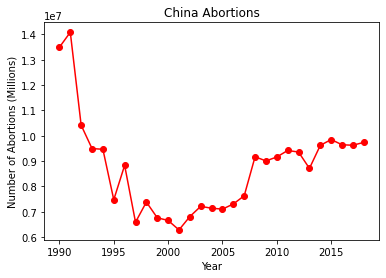

In [169]:
country_grouped = country.groupby('yearend').agg({'numberofabortions': 'sum'})
import matplotlib.pyplot as plt
plt.plot(country_grouped['numberofabortions'], color='red', marker='o')
plt.title(f'{choice} Abortions')
plt.xlabel('Year')
plt.ylabel('Number of Abortions (Millions)')

## United States of America 🇺🇸
- Roe v. Wade

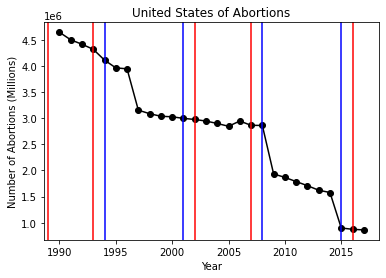

In [184]:
amer_grouped = amer_df.groupby('yearend').agg({'numberofabortions': 'sum'})
plt.plot(amer_grouped['numberofabortions'], color='black', marker='o')
plt.title(f'United States of Abortions')
plt.xlabel('Year')
plt.ylabel('Number of Abortions (Millions)')
plt.axvline(x = 1989, color = 'r', label = 'axvline - full height')
plt.axvline(x = 1993, color = 'r', label = 'axvline - full height')
plt.axvline(x = 1994, color = 'b', label = 'axvline - full height')
plt.axvline(x = 2001, color = 'b', label = 'axvline - full height')
plt.axvline(x = 2002, color = 'r', label = 'axvline - full height')
plt.axvline(x = 2007, color = 'r', label = 'axvline - full height')
plt.axvline(x = 2008, color = 'b', label = 'axvline - full height')
plt.axvline(x = 2015, color = 'b', label = 'axvline - full height')
plt.axvline(x = 2016, color = 'r', label = 'axvline - full height')